In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
try:
    df_uniforme = pd.read_csv('custo_uniforme.csv')
    df_circulo = pd.read_csv('custo_circulo.csv')
    print("Arquivos CSV carregados com sucesso.")
except FileNotFoundError:
    print("ERRO: Um ou ambos os arquivos CSV não foram encontrados. Por favor, verifique os nomes.")
    exit()

Arquivos CSV carregados com sucesso.


In [ ]:
def ajustar_curva_onlogn(df, tempo_col='Tempo_ms'):
    """Calcula a constante C para ajustar a curva O(N log N) aos dados medidos."""
    N = df['Tamanho_N']
    Tempo_medido = df[tempo_col]

    # Evita log(0) ou log(1)
    N_ajustado = N.apply(lambda x: x if x > 1 else 2)
    # Usando log natural (np.log) ou log na base 2 (np.log2). O formato não muda o O(N log N).
    tempo_log = np.log(N_ajustado)

    # Estima C = média(Tempo / (N * log N))
    C_estimado = (Tempo_medido / (N * tempo_log)).mean()

    curva_teorica = C_estimado * N * tempo_log

    return curva_teorica, C_estimado

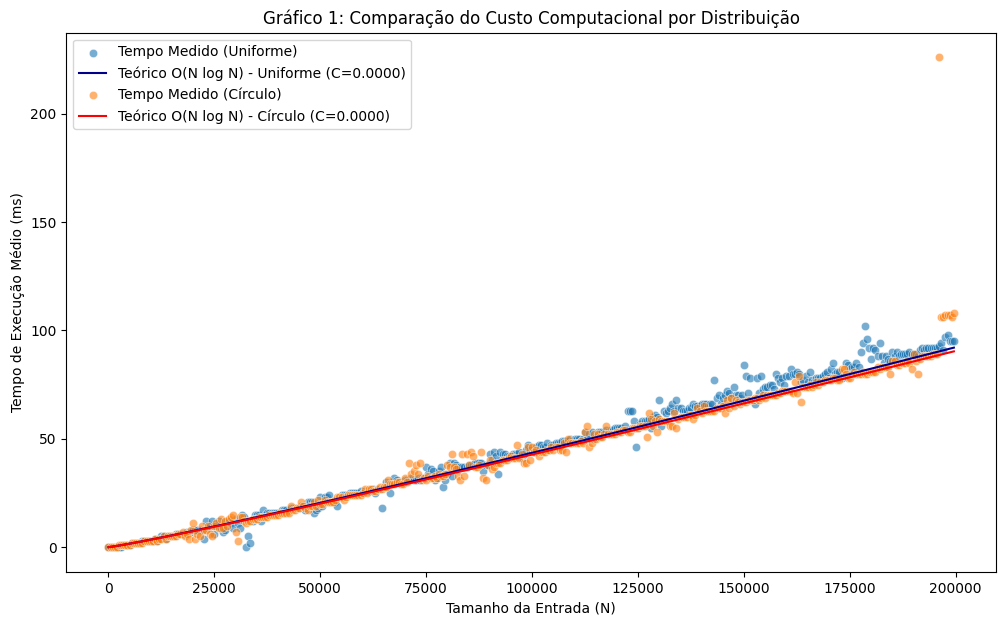

In [ ]:
curva_uni, c_uni = ajustar_curva_onlogn(df_uniforme)
curva_circ, c_circ = ajustar_curva_onlogn(df_circulo)

plt.figure(figsize=(12, 7))

# Curva Uniforme
sns.scatterplot(x='Tamanho_N', y='Tempo_ms', data=df_uniforme, alpha=0.6,
                label='Tempo Medido (Uniforme)', color='C0')
sns.lineplot(x=df_uniforme['Tamanho_N'], y=curva_uni, color='darkblue',
             label=f'Teórico O(N log N) - Uniforme (C={c_uni:.4f})')

# Curva Círculo
sns.scatterplot(x='Tamanho_N', y='Tempo_ms', data=df_circulo, alpha=0.6,
                label='Tempo Medido (Círculo)', color='C1')
sns.lineplot(x=df_circulo['Tamanho_N'], y=curva_circ, color='red',
             label=f'Teórico O(N log N) - Círculo (C={c_circ:.4f})')

plt.title('Gráfico 1: Comparação do Custo Computacional por Distribuição')
plt.xlabel('Tamanho da Entrada (N)')
plt.ylabel('Tempo de Execução Médio (ms)')
plt.legend()
plt.grid(False)
plt.show()

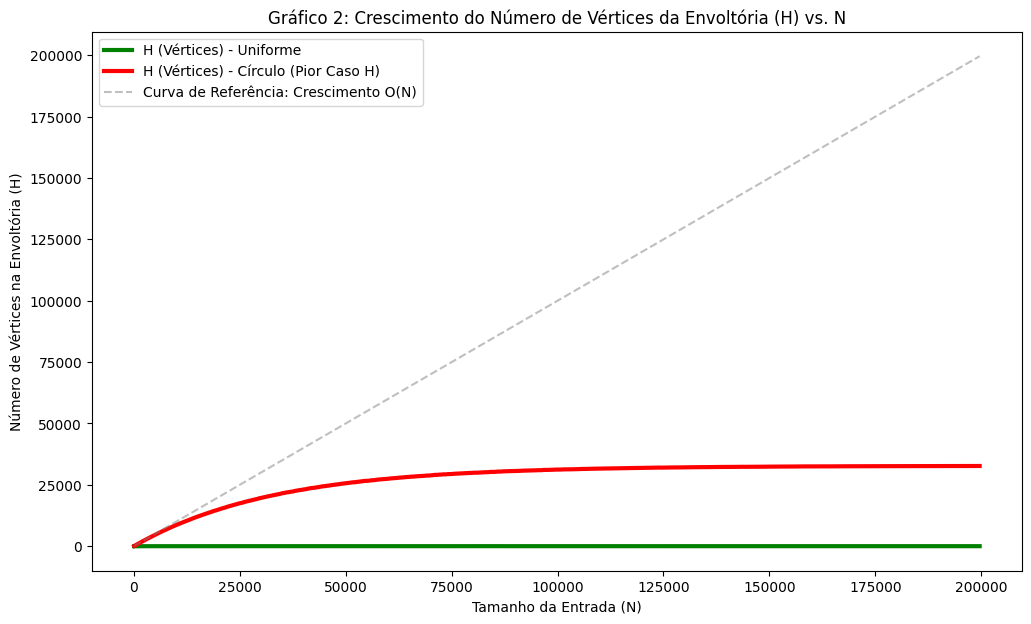

In [ ]:
plt.figure(figsize=(12, 7))

# 4.1. Curva N vs H para Distribuição Uniforme
sns.lineplot(x='Tamanho_N', y='Vertices_H', data=df_uniforme, linewidth=3,
             label='H (Vértices) - Uniforme', color='green')

# 4.2. Curva N vs H para Distribuição Circular (Pior Caso)
sns.lineplot(x='Tamanho_N', y='Vertices_H', data=df_circulo, linewidth=3,
             label='H (Vértices) - Círculo (Pior Caso H)', color='red')

# Adicionando uma referência teórica para N (Linha Reta O(N))
plt.plot(df_circulo['Tamanho_N'], df_circulo['Tamanho_N'], linestyle='--', color='gray',
         alpha=0.5, label='Curva de Referência: Crescimento O(N)')


plt.title('Gráfico 2: Crescimento do Número de Vértices da Envoltória (H) vs. N')
plt.xlabel('Tamanho da Entrada (N)')
plt.ylabel('Número de Vértices na Envoltória (H)')
plt.legend()
plt.grid(False)
plt.show()


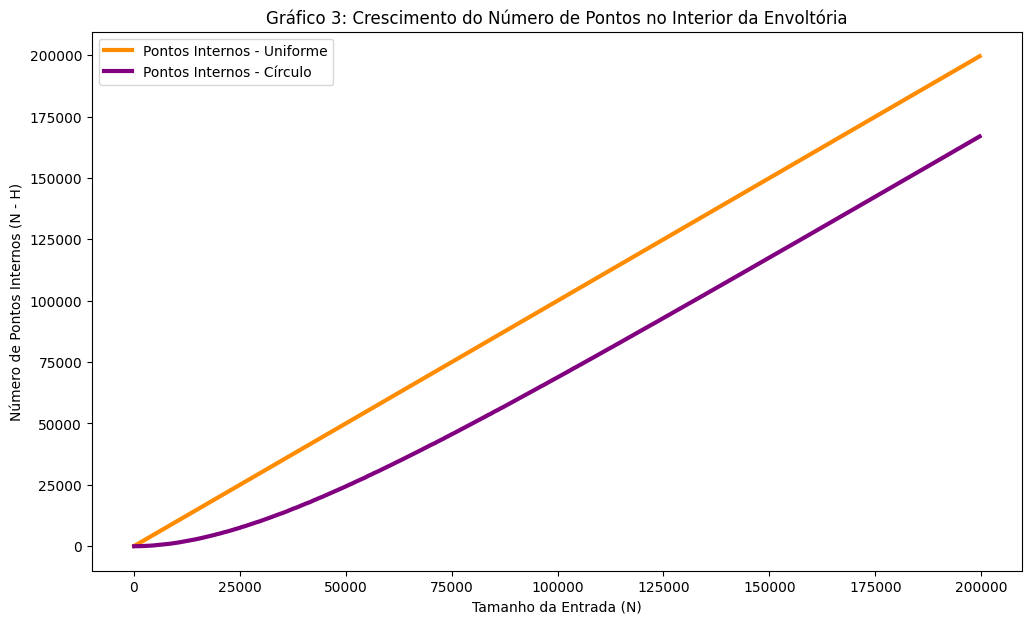

In [ ]:
df_uniforme['Pontos_Internos'] = df_uniforme['Tamanho_N'] - df_uniforme['Vertices_H']
df_circulo['Pontos_Internos'] = df_circulo['Tamanho_N'] - df_circulo['Vertices_H']

plt.figure(figsize=(12, 7))
sns.lineplot(x='Tamanho_N', y='Pontos_Internos', data=df_uniforme, linewidth=3,
             label='Pontos Internos - Uniforme', color='darkorange')
sns.lineplot(x='Tamanho_N', y='Pontos_Internos', data=df_circulo, linewidth=3,
             label='Pontos Internos - Círculo', color='purple')

plt.title('Gráfico 3: Crescimento do Número de Pontos no Interior da Envoltória')
plt.xlabel('Tamanho da Entrada (N)')
plt.ylabel('Número de Pontos Internos (N - H)')
plt.legend()
plt.grid(False)
plt.show()